In [1]:
# Simple Linear Regression

# Train a simple linear regression model using the dataset.
# Use 'Car_Mileage' to predict 'Car_Price'.
# Handle missing values by replacing them with the mean. Split the data into training and test sets.
# Train the model, visualize the results, and predict the price for a car with 110,000 km mileage.
# Display the coefficient, intercept, and evaluate the model’s prediction.
#

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# Step 1: Load the dataset

dataset = pd.read_csv('Car Data.csv')

In [7]:
# Step 2: Select only the first 150 rows, and extract relevant columns

# Column 7 -> Mileage, Column 9 -> Car Price
X = dataset.iloc[:150, 7].values.reshape(-1, 1)  # Car Mileage
Y = dataset.iloc[:150, 9].values.reshape(-1, 1)  # Car Price

In [9]:
# Step 3: Handle missing data by replacing NaNs with column mean

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [11]:
# Step 4: Split the dataset into training and testing data (80/20 split)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
# Step 5: Create and train the Simple Linear Regression model

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Step 6: Predict prices for the test set

y_pred = regressor.predict(X_test)

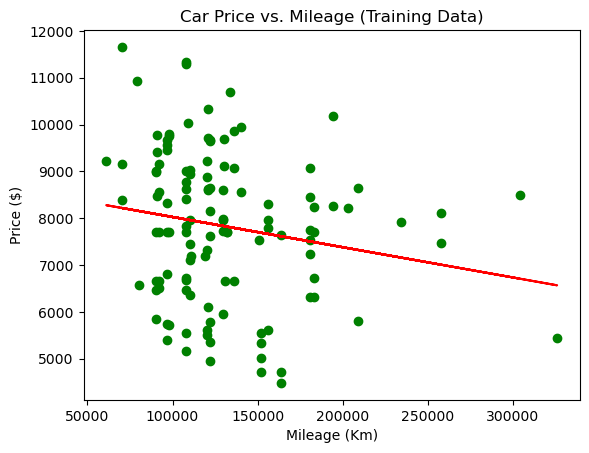

In [17]:
# Step 7: Visualize the training data and regression line
plt.scatter(X_train, Y_train, color='green')  # Actual data points
plt.plot(X_train, regressor.predict(X_train), color='red')  # Regression line
plt.title('Car Price vs. Mileage (Training Data)')
plt.xlabel('Mileage (Km)')
plt.ylabel('Price ($)')
plt.show()

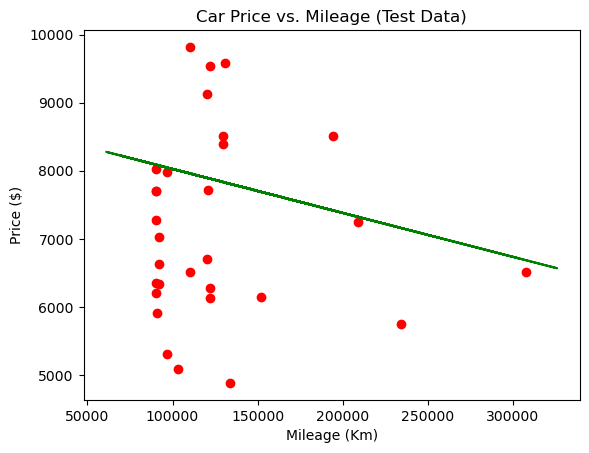

In [19]:
# Step 8: Visualize the test data and regression line
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Car Price vs. Mileage (Test Data)')
plt.xlabel('Mileage (Km)')
plt.ylabel('Price ($)')
plt.show()

In [21]:
# Step 9: Predict the price of a car with 110000 km mileage

predicted_price = regressor.predict([[110000]])
print('Predicted price for 110000 km mileage:', predicted_price)

Predicted price for 110000 km mileage: [[7962.03257156]]


In [23]:
# Step 10: Display the model parameters

print('Model Coefficient (Slope):', regressor.coef_)
print('Model Intercept (Constant):', regressor.intercept_)

Model Coefficient (Slope): [[-0.00645536]]
Model Intercept (Constant): [8672.12189168]


In [25]:
# Summary:

# This model uses mileage to predict car price using simple linear regression.
#   More mileage = lower price (negative relationship).
#   For a car with 110,000 km, the model predicts a price of about $7962.
#   Missing values are filled using the average.
# The model is trained and tested on separate data (train-test split).

# Why This Matters in Finance:
#    Helps estimate car resale values.
#    Useful for asset depreciation, loan decisions, or insurance pricing.
#    Builds the foundation for more advanced predictive models in financial analysis.
#